In [1]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import geopandas as gpd
import osmnx as ox

In [2]:
# Constants
CITY1 = 'Budapest, Hungary'
OTHER_CITIES = [
    'Szolnok, Hungary',
    'Szeged, Hungary',
    'Debrecen, Hungary',
    'Miskolc, Hungary',
    'Pécs, Hungary',
    'Győr, Hungary',
    'Székesfehérvár, Hungary',
    'Zalaegerszeg, Hungary',
    'Sopron, Hungary',
    'Kecskemét, Hungary'
]
CRS = 'EPSG:23700' 

In [3]:
# Download and project Budapest
budapest = ox.geocode_to_gdf(CITY1).to_crs(CRS)
center_budapest = budapest.geometry.centroid.iloc[0]
area_budapest_km2 = budapest.area.iloc[0] / 1e6

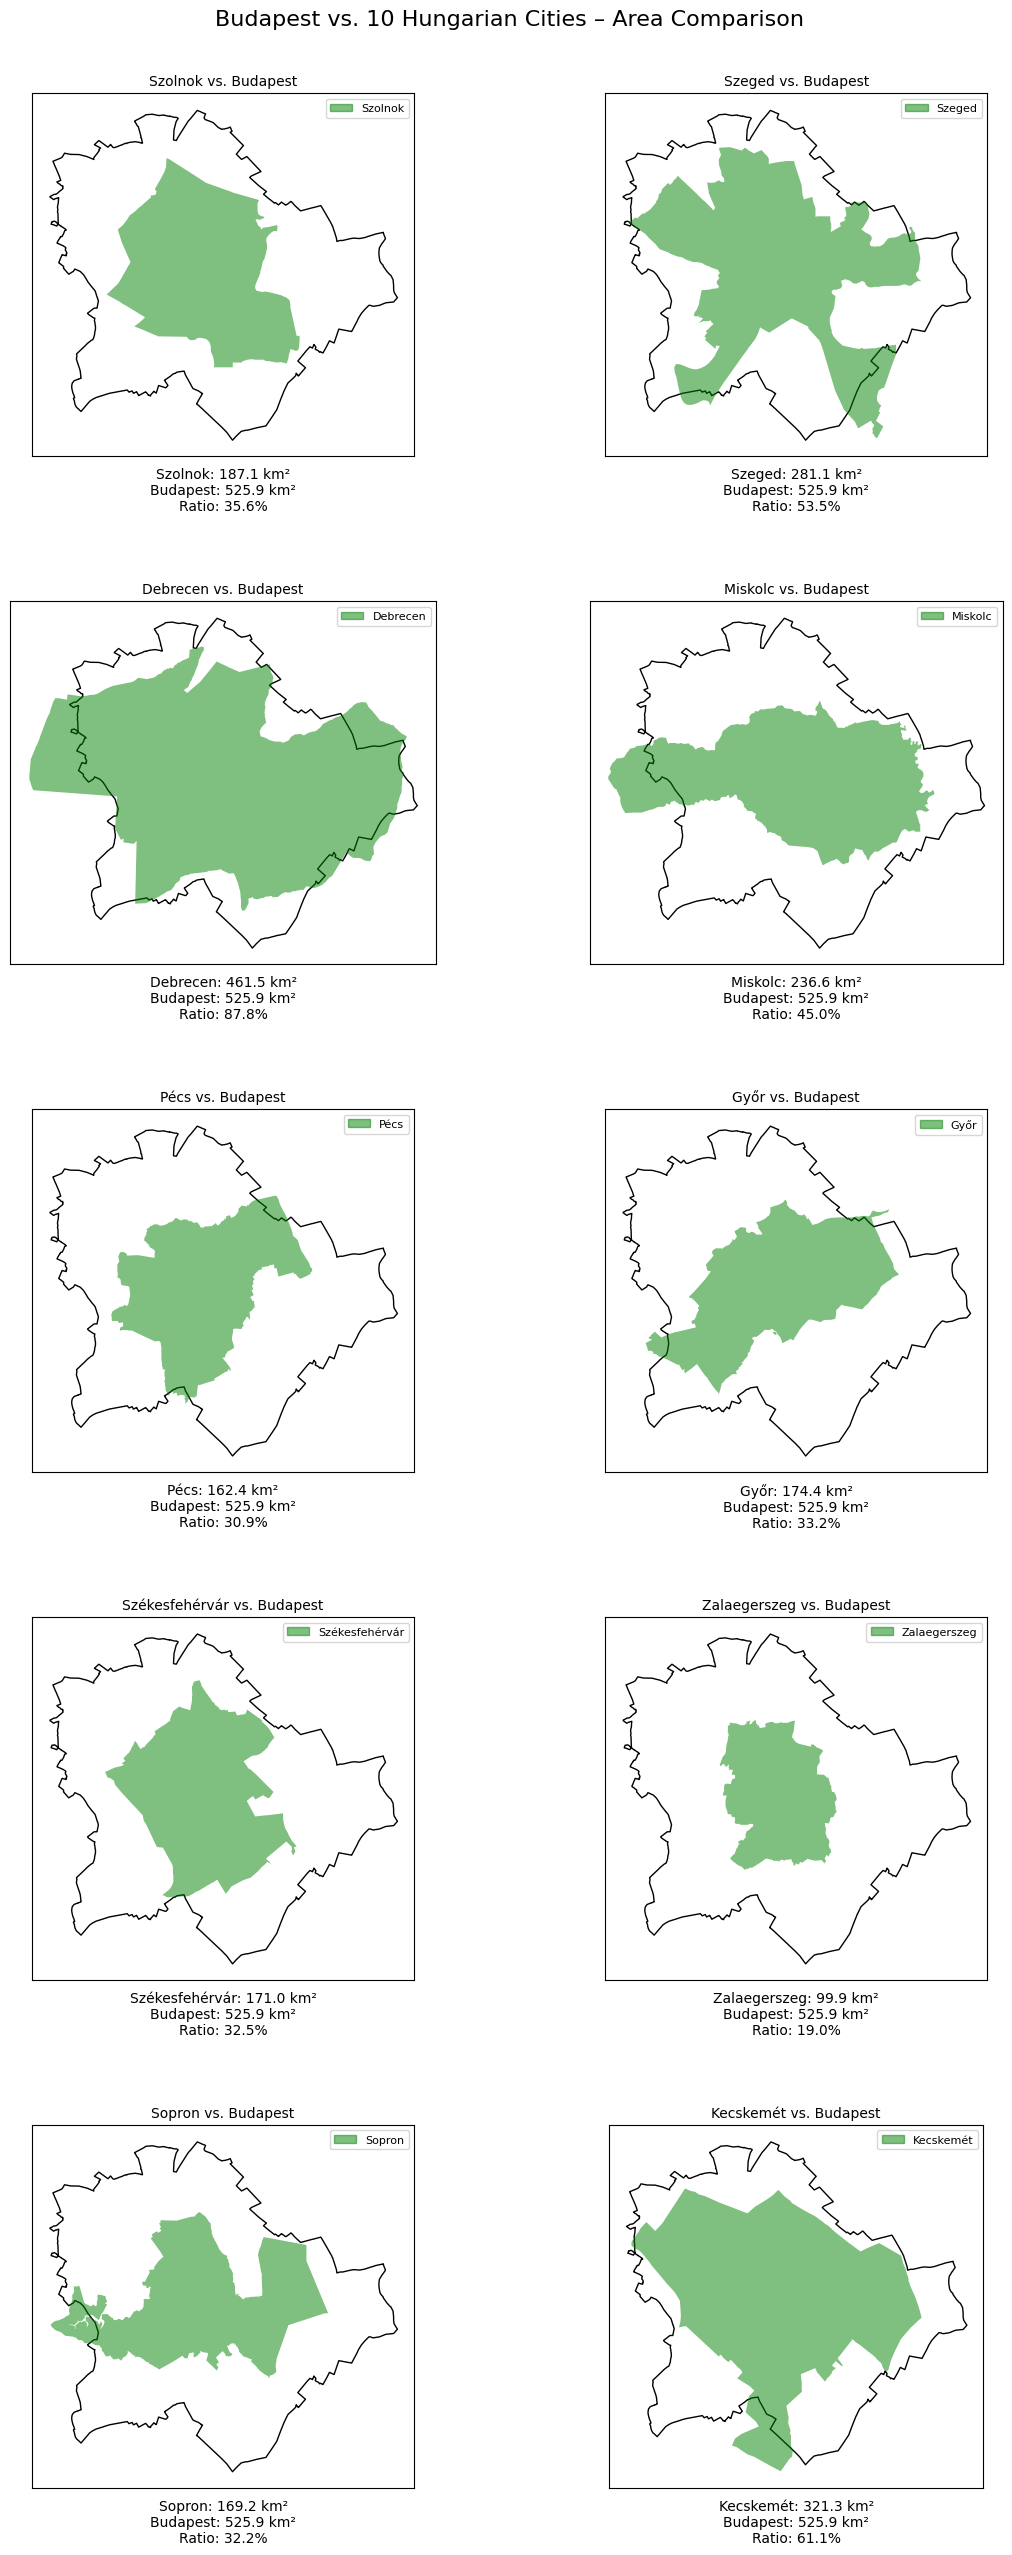

In [4]:
# Create subplot
fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(12, 25))
axes = axes.flatten()

# Loop through each city
for i, city in enumerate(OTHER_CITIES):
    # Download and project current city
    gdf = ox.geocode_to_gdf(city).to_crs(CRS)
    center = gdf.geometry.centroid.iloc[0]

    # Align to Budapest
    gdf_aligned = gdf.copy()
    gdf_aligned['geometry'] = gdf.geometry.translate(
        xoff=center_budapest.x - center.x,
        yoff=center_budapest.y - center.y
    )

    # Plot Budapest and the aligned city
    ax = axes[i]
    budapest.plot(ax=ax, color='white', edgecolor='black')
    gdf_aligned.plot(ax=ax, color='green', alpha=0.5)

    # Legend and title
    city_name = city.split(',')[0]
    green_patch = mpatches.Patch(color='green', alpha=0.5, label=city_name)
    ax.legend(handles=[green_patch], loc='upper right', fontsize=8)
    ax.set_title(f"{city_name} vs. Budapest", fontsize=10)
    ax.set_xticks([])
    ax.set_yticks([])

    # Area ratio
    area_km2 = gdf.area.iloc[0] / 1e6
    ratio = area_km2 / area_budapest_km2
    ax.text(0.5, -0.03, f"{city_name}: {area_km2:.1f} km²\n"
                        f"Budapest: {area_budapest_km2:.1f} km²\n"
                        f"Ratio: {ratio:.1%}",
            transform=ax.transAxes,
            ha='center', va='top', fontsize=10)

# Hide any unused axes (in case list length < subplot count)
for j in range(len(OTHER_CITIES), len(axes)):
    fig.delaxes(axes[j])

# Adjust layout
plt.tight_layout()
plt.subplots_adjust(hspace=0.4)
plt.suptitle("Budapest vs. 10 Hungarian Cities – Area Comparison", fontsize=16, y=1.02)
plt.savefig('Budapest vs Hungarian Cities.png', dpi=300, bbox_inches='tight')
plt.show()